<a href="https://colab.research.google.com/github/Cassandra-Cruz/Diplomado-Ciencia-Matematica-de-Datos/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analyst: Covid-19**

# Dataset description

## Context
##### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

##### During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

## Content

##### The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. **In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**


*    **sex**: 1 for female and 2 for male.
*    **age**: of the patient.
*    **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
*    **patient type**: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
*    **pneumonia**: whether the patient already have air sacs inflammation or not.
*    **pregnancy**: whether the patient is pregnant or not.
*    **diabetes**: whether the patient has diabetes or not.
*    **copd**: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
*    **asthma**: whether the patient has asthma or not.
*    **inmsupr**: whether the patient is immunosuppressed or not.
*    **hypertension**: whether the patient has hypertension or not.
*    **cardiovascular**: whether the patient has heart or blood vessels related disease.
*    **renal chronic**: whether the patient has chronic renal disease or not.
*   **other disease**: whether the patient has other disease or not.
*    **obesity**: whether the patient is obese or not.
*    **tobacco**: whether the patient is a tobacco user.
*    **usmr**: Indicates whether the patient treated medical units of the first, second or third level.
*    **medical unit**: type of institution of the National Health System that provided the care.
*    **intubed**: whether the patient was connected to the ventilator.
*    **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
*    **date died**: If the patient died indicate the date of death, and 9999-99-99 otherwise.



In [24]:
from google.colab import drive

In [25]:
import pandas as pd
import numpy as np

In [26]:
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from string import hexdigits

In [27]:
def format_title(title, subtitle=None, subtitle_font_size=14):
        title = f'{title}'
        if not subtitle:
            return title
        subtitle = f'{subtitle}'
        return f'{title}{subtitle}'

In [28]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
%cd /content/drive/ My \Drive/Ciencia de Datos

/content/drive/ My Drive/Ciencia de Datos


In [106]:
# Let's take a look at the dataset
df = pd.read_csv('Covid Data.csv')
#df.head()
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [31]:
# Number of data
df.shape

(1048575, 21)

In [32]:
# We have 1048575 people evaluated in 21 different categories
# Basic statistics
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [34]:
df.describe(include='all')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,...,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,...,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [35]:
# I added a column about the dates of death
df['TOTAL_DEATHS'] = df['DATE_DIED']
df.shape

(1048575, 22)

In [36]:
# Deleted the cases where this information is unknown in 'DATE_DIED' to the new column
df['TOTAL_DEATHS'] = df['TOTAL_DEATHS'].apply(lambda x: x.replace('9999-99-99',''))
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,TOTAL_DEATHS
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,03/05/2020
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,03/06/2020
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,09/06/2020
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,12/06/2020
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,21/06/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,


In [37]:
# I create a function to change the format date '%d/%m/%Y' to '%m/%d/%Y'
from datetime import datetime
def convert(df):
    try:
        return datetime.strptime(df, '%d/%m/%Y').strftime('%m/%d/%Y')
    except ValueError:
        return df

In [38]:
df['TOTAL_DEATHS'] = df['TOTAL_DEATHS'].apply(convert)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,TOTAL_DEATHS
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,05/03/2020
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,06/03/2020
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,06/09/2020
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,06/12/2020
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,06/21/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,


In [39]:
# Female percentage
num = 1
listaNumeros=df['SEX'].values.tolist()
percentage1=listaNumeros.count(num)/len(listaNumeros) * 100
print(percentage1)

50.07405288129127


In [40]:
# Male percentage
num = 2
listaNumeros=df['SEX'].values.tolist()
percentage2=listaNumeros.count(num)/len(listaNumeros) * 100
print(percentage2)

49.92594711870873


In [41]:
# Pregnant or non-pregnant women's account (1 = yes, 2 = not)
df['PREGNANT'].value_counts(ascending=False)

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [138]:
# Pregnant women with diabetes
df_pregnant = pd.DataFrame(df.groupby(['DIABETES']).PREGNANT.value_counts())
df_pregnant

count
DIABETES PREGNANT        
1        97         64244
         2          60215
         98           295
         1            235
2        97        457318
         2         451768
         1           7884
         98          3278
98       97          1949
         2           1196
         98           181
         1             12

In [42]:
import plotly.graph_objects as go

labels = ['Pregnant (8131)','Non-pregnant (513179)','Unknown (527265)']
values = [8131, 513179, 527265]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [43]:
# Pregnant women percentage
num = 1
listaNumeros=df['PREGNANT'].values.tolist()
perc1=listaNumeros.count(num)/len(listaNumeros) * 100
print(perc1)

0.7754333261807691


In [44]:
# Non-Pregnant women percentage
num = 2
listaNumeros=df['PREGNANT'].values.tolist()
perc2=listaNumeros.count(num)/len(listaNumeros) * 100
print(perc2)

48.94060987530696


In [45]:
# Number of non-Pregnant women
num = 2
listaNumeros=df['PREGNANT'].values.tolist()
perc2=listaNumeros.count(num)
print(perc2)

513179


In [46]:
# Number of pregnant women percentage
num = 1
listaNumeros=df['PREGNANT'].values.tolist()
perc1=listaNumeros.count(num)
print(perc1)

8131


In [47]:
# Patients with pneumonia (1 = yes, 2 = not)
df['PNEUMONIA'].value_counts(ascending=False)

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

In [48]:
labels = ['Pneumonia (140038)','Non-pneumonia (892533)','Unknown (16003)']
values = [140038, 892533, 16003]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [137]:
# Patients who use tobacco and have pneumonia (1 = yes, 2 = not)
df_pneumo = pd.DataFrame(df.groupby(['TOBACCO']).PNEUMONIA.value_counts())
df_pneumo

count
TOBACCO PNEUMONIA        
1       2           70838
        1           12393
        99           1145
2       2          819349
        1          126793
        99          14837
98      2            2347
        1             852
        99             21

In [49]:
# Patients with diabetes (1 = yes, 2 = not)
df['DIABETES'].value_counts(ascending=False)

DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64

In [50]:
labels = ['Diabetes (124989)', 'Non-diabetes (920247)', 'Unknown (16003)']
values = [124989, 920247, 16003]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [140]:
# the patient has kidney damage and obesity (1 = yes, 2 = not)
df_obes = pd.DataFrame(df.groupby(['RENAL_CHRONIC']).OBESITY.value_counts())
df_obes

count
RENAL_CHRONIC OBESITY        
1             2         15152
              1          3734
              98           18
2             2        870312
              1        155892
              98          461
98            98         2553
              2           263
              1           190

In [51]:
# Intubed patients (1 = yes, 2 = not)
df['INTUBED'].value_counts(ascending=False)

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

In [52]:
labels = ['Intubed (33656)', 'Non-intubed (159050)', 'Unknown (855868)']
values = [33656, 159050, 855868]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [141]:
# the patient with asthma who were intubed (1 = yes, 2 = not)
df_ast = pd.DataFrame(df.groupby(['INTUBED']).ASTHMA.value_counts())
df_ast

count
INTUBED ASTHMA        
1       2        32673
        1          697
        98         286
2       2       154216
        1         4077
        98         757
97      2       820314
        1        26317
        98        1913
99      2         6821
        1          481
        98          23

In [53]:
# Petient type (1 = returned home, 2 = hospitalization)
df['PATIENT_TYPE'].value_counts(ascending=False)

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

In [54]:
labels = ['Returned home (848543)', 'Hospitalization (200031)']
values = [848543, 200031]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [144]:
# Petient type with inmsupr (1 = returned home, 2 = hospitalization)
df_inmsupr = pd.DataFrame(df.groupby(['INMSUPR']).PATIENT_TYPE.value_counts())
df_inmsupr

count
INMSUPR PATIENT_TYPE        
1       2               7149
        1               7021
2       1             839399
        2             191602
98      1               2124
        2               1280

In [55]:
# Patients with hipertension (1 = yes, 2 = not)
df['HIPERTENSION'].value_counts(ascending=False)

HIPERTENSION
2     882742
1     162729
98      3104
Name: count, dtype: int64

In [56]:
labels = ['Hipertension (162729)', 'Non-hipertension (882741)', 'Unknown (3104)']
values = [162729, 882741, 3104]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [145]:
# Number of men and women with hypertension (1 = female, 2 = male, 1 = yes, 2 = not)
df_sex = pd.DataFrame(df.groupby(['HIPERTENSION']).SEX.value_counts())
df_sex

count
HIPERTENSION SEX        
1            2     81778
             1     80951
2            1    442829
             2    439913
98           2      1820
             1      1284

In [57]:
# Patients with other disease (1 = yes, 2 = not)
df['OTHER_DISEASE'].value_counts(ascending=False)

OTHER_DISEASE
2     1015490
1       28040
98       5045
Name: count, dtype: int64

In [58]:
labels = ['Other disease = yes (28040)', 'Other disease = not (1015489)', 'Unknown (5045)']
values = [28040, 1015489, 5045]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [59]:
# The patient has heart or blood vessels related disease (1 = yes, 2 = not)
df['CARDIOVASCULAR'].value_counts(ascending=False)

CARDIOVASCULAR
2     1024730
1       20769
98       3076
Name: count, dtype: int64

In [60]:
labels = ['Cardiovascular disease = yes (20769)', 'Cardiovascular disease = not (1024729)', 'Unknown (3076)']
values = [20769, 1024729, 3076]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [147]:
# Cardiovascular problems and age ( 1 = yes, 2 = not)
df_cardio = pd.DataFrame(df.groupby(['CARDIOVASCULAR']).AGE.value_counts())
df_cardio

count
CARDIOVASCULAR AGE       
1              60     473
               67     450
               52     430
               64     430
               66     422
...                   ...
98             101      2
               98       2
               7        1
               5        1
               102      1

[326 rows x 1 columns]

In [61]:
# The patient has obesity (1 = yes, 2 = not)
df['OBESITY'].value_counts(ascending=False)

OBESITY
2     885727
1     159816
98      3032
Name: count, dtype: int64

In [62]:
labels = ['Obesity (159816)', 'Non-obesity (885726)', 'Unknown (3032)']
values = [159816, 885726, 3032]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [63]:
# The patient has renal chronic disease (1 = yes, 2 = not)
df['RENAL_CHRONIC'].value_counts(ascending=False)

RENAL_CHRONIC
2     1026665
1       18904
98       3006
Name: count, dtype: int64

In [64]:
labels = ['Renal chronic (18904)', 'Non-renal chronic (1026664)', 'Unknown (3006)']
values = [18904, 1026664, 3006]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [65]:
# The patient uses tobacco (1 = yes, 2 = not)
df['TOBACCO'].value_counts(ascending=False)

TOBACCO
2     960979
1      84376
98      3220
Name: count, dtype: int64

In [66]:
labels = ['Tobacco (84376)', 'Non-tobacco (960978)', 'Unknown (3220)']
values = [84376, 960978, 3220]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [67]:
# CLASIDDICATION: Values 1-3 mean that the patient was diagnosed with covid in different degrees.
# 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive (1 = yes, 2 = not)
df['CLASIFFICATION_FINAL'].value_counts(ascending=False)

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [68]:
labels = ['1 (8601)', '2 (1851)', '3 (381527)', '4 (3122)', '5 (26091)', '6 (128133)', '7 (499249)']
values = [8601, 1851, 381527, 3122, 26091, 128133, 499249]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [69]:
# Indicates whether the patient had been admitted to an Intensive Care Unit (1 = yes, 2 = not)
df['ICU'].value_counts(ascending=False)

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [70]:
labels = ['ICU (16858)', 'Non-ICU (175685)', 'Unknown (856031)']
values = [16858, 175685, 856031]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [71]:
# Indicates whether the patient has Chronic obstructive pulmonary disease or not (1 = yes, 2 = not)
df['COPD'].value_counts(ascending=False)

COPD
2     1030510
1       15062
98       3003
Name: count, dtype: int64

In [72]:
labels = ['COPD (15062)', 'Non-COPD (1030509)', 'Unknown (3003)']
values = [15062, 1030509, 3003]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [73]:
#Wether the patient has asthma or not (1 = yes, 2 = not)
df['ASTHMA'].value_counts(ascending=False)

ASTHMA
2     1014024
1       31572
98       2979
Name: count, dtype: int64

In [74]:
labels = ['ASTHMA (31572)', 'Non-ASTHMA (1014023)', 'Unknown (2979)']
values = [31572, 1014023, 2979]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [75]:
# Whether the patient is immunosuppressed or not (1 = yes, 2 = not)
df['INMSUPR'].value_counts(ascending=False)

INMSUPR
2     1031001
1       14170
98       3404
Name: count, dtype: int64

In [76]:
labels = ['INMSUPR (14170)', 'Non-INMSUPR (1031000)', 'Unknown (3404)']
values = [14170, 1031000, 3404]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=.3)
                            ])
fig.show()

In [77]:
# Total deaths
df['TOTAL_DEATHS'].value_counts(ascending=False)

TOTAL_DEATHS
              971633
07/06/2020      1000
07/07/2020       996
07/13/2020       990
06/16/2020       979
               ...  
11/24/2020         1
12/17/2020         1
12/08/2020         1
03/16/2021         1
04/22/2021         1
Name: count, Length: 401, dtype: int64

In [78]:
# Date of the deaths
df['SEX'].value_counts(ascending=False)

SEX
1    525064
2    523511
Name: count, dtype: int64

In [79]:
import plotly.graph_objects as go

labels = ["Female", "Male"]
values = [525064, 523510]
colors = ["gold", "mediumturquoise"] #"darkorange", "lightgreen"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "+"])) # "+", "-"
        )
    ]
)

fig.show()

In [122]:
# Date of the deaths
df['DATE_DIED'].value_counts(ascending=False)

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [81]:
df.sort_values(by = ['AGE'], ascending = [False])

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,TOTAL_DEATHS
690837,2,12,1,1,9999-99-99,97,2,121,2,2,...,2,2,2,2,2,2,2,6,97,
394735,2,9,2,1,9999-99-99,97,1,120,97,1,...,2,1,2,2,1,2,1,1,97,
676023,2,12,2,1,9999-99-99,97,2,120,97,2,...,2,2,2,2,2,2,2,5,97,
820255,2,12,1,1,9999-99-99,97,2,120,98,2,...,2,2,2,2,2,2,2,7,97,
911976,2,12,2,1,9999-99-99,97,2,120,97,2,...,2,2,2,2,2,2,2,7,97,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374335,2,6,2,2,9999-99-99,1,1,0,97,2,...,2,2,2,2,2,2,2,7,1,
735859,1,12,2,2,9999-99-99,2,1,0,97,2,...,2,2,2,2,2,2,2,7,2,
308495,1,4,2,2,9999-99-99,2,2,0,97,2,...,2,2,2,2,2,2,2,7,2,
499588,1,12,2,1,9999-99-99,97,2,0,97,2,...,2,2,2,2,2,2,2,3,97,


In [82]:
#AGE mean
df.AGE.mean()

41.794102472403026

In [121]:
df.AGE.mode()

0    30
Name: AGE, dtype: int64

In [83]:
# Age values
df['AGE'].value_counts(ascending=False)

AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64

In [84]:
df_age = pd.DataFrame(df.groupby(['AGE']).DIABETES.value_counts())
df_age

count
AGE DIABETES       
0   2          3788
    1            55
    98           19
1   2          4780
    1            12
...             ...
118 2             2
119 2             3
120 2             4
    1             1
121 2             1

[331 rows x 1 columns]

In [104]:
#fig = px.bar(df, x = 'AGE', y = 'DIABETES', text = 'DIABETES')
#fig.update_layout(
#    yaxis_title = 'Diabetes',
#    xaxis_title = 'Age',
#    title_text = 'Ages of people with diabetes'
#)
#fig

In [107]:
# Age histogram
fig = px.histogram(df, x = 'AGE')
fig.update_layout(
    xaxis_title = 'AGE',
    yaxis_title = 'COUNTS',
    title_text = format_title('Histogram', ''),
    template = 'plotly_white',
    )
fig

In [87]:
df.groupby(['DATE_DIED']).SEX.nunique()

DATE_DIED
01/01/2021    1
01/02/2020    2
01/02/2021    1
01/03/2020    2
01/04/2020    2
             ..
31/05/2020    2
31/07/2020    2
31/08/2020    2
31/10/2020    1
9999-99-99    2
Name: SEX, Length: 401, dtype: int64

In [88]:
df_1 = df.copy()
df_1.loc[df_1['DIABETES'].sample(n = 1048575, replace = True).index, 'DATE_DIED']

166801    9999-99-99
176024    9999-99-99
534874    9999-99-99
848359    9999-99-99
361849    9999-99-99
             ...    
274480    9999-99-99
409184    9999-99-99
528503    9999-99-99
344131    13/06/2020
433058    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [89]:
# create a Boolean mask for the rows to remove 97 value (null)
mask = df['INTUBED'] == '97'

# select all rows except the ones that contain '97'
df_1 = df[~mask]

# print the resulting DataFrame
print(df_1)


         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  INMSUPR  HIPERTENSION  \
0                1   65         2         2  ...        2   

In [149]:
# Cardiovascular problems and age ( 1 = yes, 2 = not)
df_class = pd.DataFrame(df.groupby(['CLASIFFICATION_FINAL']).AGE.value_counts())
df_class

count
CLASIFFICATION_FINAL AGE       
1                    47     193
                     31     193
                     29     192
                     39     190
                     46     189
...                         ...
7                    114      1
                     113      1
                     118      1
                     111      1
                     116      1

[724 rows x 1 columns]

In [90]:
# Count of how many people are not on death dates
# 9999-99-99: There are 971632 people
import numpy as np

index, counts = np.unique(
    df[["DATE_DIED"]].to_numpy(),
    return_counts=True
    )
suma = pd.Series(counts,  index)
print(suma)

01/01/2021         1
01/02/2020        13
01/02/2021         1
01/03/2020        11
01/04/2020        56
               ...  
31/05/2020       776
31/07/2020       139
31/08/2020         5
31/10/2020         1
9999-99-99    971633
Length: 401, dtype: int64


In [91]:
# Deaths percentage
import plotly.graph_objects as go

labels = ["Deaths", "Non-deaths"]
values = [76942, 971632]
colors = ["darkorange", "lightgreen"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "+"])) # "+", "-"
        )
    ]
)

fig.show()

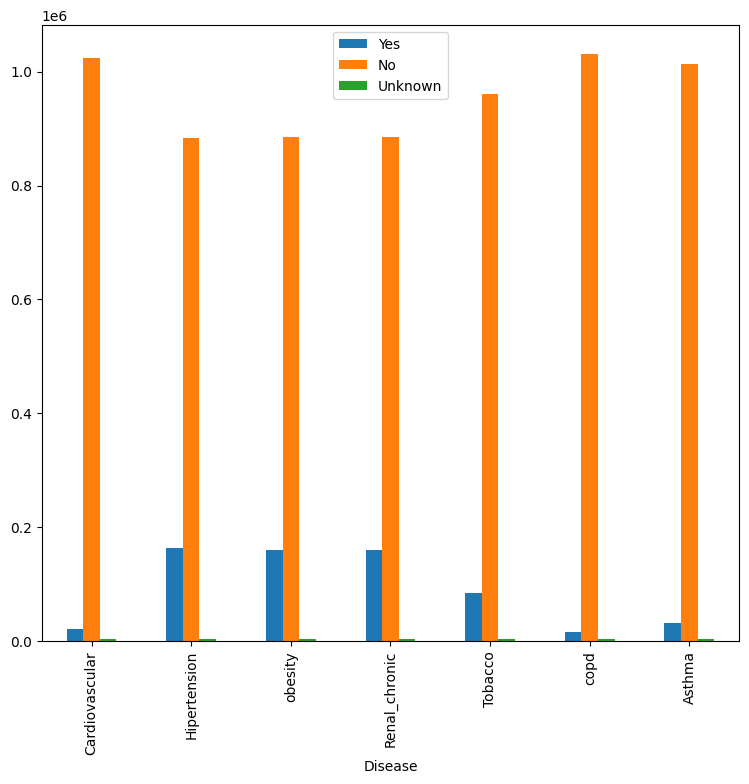

In [92]:
# Number of people with each medical condition
import pandas as pd

data = [
    ["Cardiovascular", 20769, 1024729, 3076],
    ["Hipertension", 162729, 882741, 3104],
    ["obesity", 159816, 885726, 3032],
    ["Renal_chronic", 159816, 885726, 3032],
    ["Tobacco", 84376, 960978, 3220],
    ["copd", 15062, 1030509, 3003],
    ["Asthma", 31572, 1014023, 2979],
]

df_disease = pd.DataFrame(data, columns=["Disease","Yes", "No", "Unknown"])
df_disease.plot(x="Disease", y=["Yes", "No", "Unknown"], kind="bar", figsize=(9, 8))
plt.show()


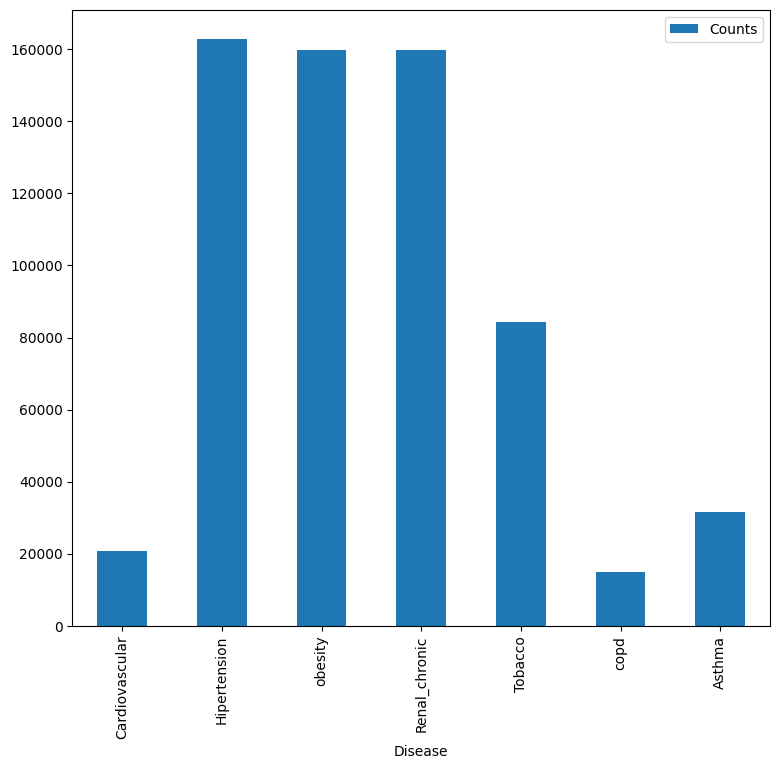

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    ["Cardiovascular", 20769],
    ["Hipertension", 162729],
    ["obesity", 159816],
    ["Renal_chronic", 159816],
    ["Tobacco", 84376],
    ["copd", 15062],
    ["Asthma", 31572],
]

df_disease = pd.DataFrame(data, columns=["Disease","Counts"])
df_disease.plot(x="Disease", y=["Counts"], kind="bar", figsize=(9, 8))
plt.show()

In [94]:
# Disease cases
import plotly.express as px

data = [
    ["Cardiovascular", 20769],
    ["Hipertension", 162729],
    ["obesity", 159816],
    ["Renal_chronic", 159816],
    ["Tobacco", 84376],
    ["copd", 15062],
    ["Asthma", 31572],
]
df_3 = pd.DataFrame(data, columns=["Disease","Counts"])
fig = px.histogram(df_3, x="Disease", y="Counts", color="Counts", marginal="rug",
                   hover_data=df_3.columns)
fig.show()

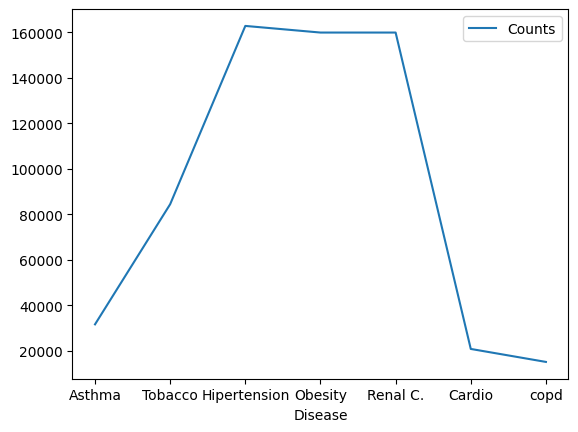

In [95]:
# Disease
df = pd.DataFrame({'Disease':['Asthma', 'Tobacco', 'Hipertension', 'Obesity', 'Renal C.', 'Cardio', 'copd'],
                   'Counts':[31572, 84376, 162729, 159816, 159816, 20769, 15062]})
                   #'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]})
df = df.set_index('Disease')
fig, ax = plt.subplots()
df.plot(ax = ax)
plt.show()


In [112]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [123]:
# type of medical institution
df['MEDICAL_UNIT'].value_counts(ascending=False)

MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

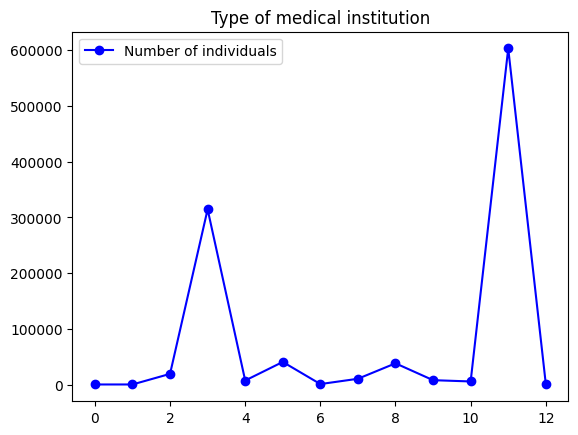

In [134]:
ys = [151, 169, 19175, 314405, 7244, 40584, 891, 10399, 38116, 7873, 5577, 602995, 996]
xs = [x for x in range(len(ys))]

#plt.plot(xs, ys)
#plt.show()
# Make sure to close the plt object once done

plt.figure()
plt.plot(xs, ys, "-bo", label="Number of individuals")
plt.title("Type of medical institution")
plt.legend()
plt.show()


## In a nutsell

*   Pregnant women with diabetes: 64224
*   Patients who use tobacco and have pneumonia: 12393
*   Patient has kidney damage and obesity: 3734
*   Patients with asthma who were intubated: 697
*   Patients with immunosuppressed system sent home: 7149, hospitalized: 7021
*   Number of men and women with hypertension: 81778/80951
*   Cardiovascular problems and age: 50-60 years old, on average 400 people in this population.


## Conclusions

In this dataset, a general analysis of the medical conditions of individuals in a population of ~1.5M, who were symptomatic or tested positive for Covid-19, was performed.

Interesting data that can be further explored in this dataset:

*   Main medical conditions related to deaths.
*   Exploration of the degree of classification of patients, with respect to their age.
*   How many deaths there are compared to the number of cases.

I consider that this dataset had enough characteristics of the patients, the analysis could be complemented by taking into account more variables such as:

*   Patient physical activity
*   Covid symptoms
*   Vaccines (dose/type)
*   Medical equipment in hospitals
*   Case study by region

